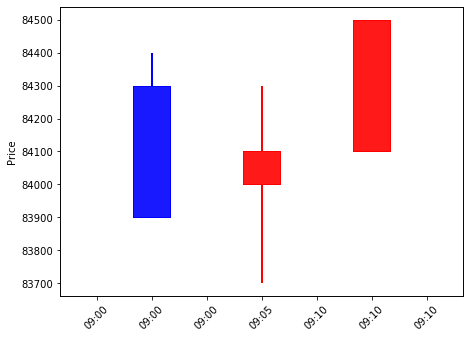

High =  84500 y =  84300.0 x1 =  0 x2 =  3


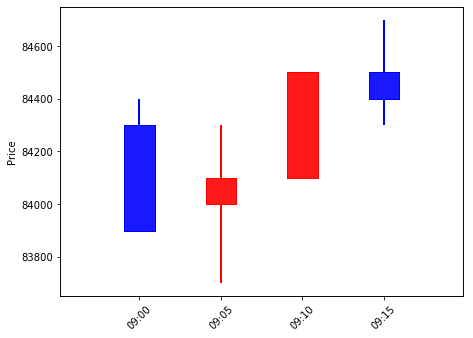

High =  84700 y =  84466.66666666667 x1 =  0 x2 =  4


In [22]:
import pymysql
import mplfinance as mpf
import pandas as pd

connect = pymysql.connect(host='localhost', port = 3306, user='root', 
            password='1234', db='INVESTAR', charset='utf8', 
                          autocommit = True, cursorclass = pymysql.cursors.DictCursor)
sql = "SELECT * FROM min_price WHERE code=000270 AND date LIKE '2021-09-17%'"
cur = connect.cursor()
cur.execute(sql)

df = cur.fetchmany(2)

def draw_linear(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1) # 기울기 계산
    n = y1 - (m*x1) # 절편 계산
    return m, n

def out_of_hline(x, y, m, n, h_num2):
    if y > m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final)
        h_num2 = len(dict_df)
        print('High = ', y, 'y = ', m*x+n, 'x1 = ', h_num1, 'x2 = ', h_num2)
        return y, h_num2
    else:
        return h_x2, h_num2
    
def out_of_lline(x, y, m, n, l_num2):
    if y < m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final) 
        l_num2 = len(dict_df)
        print('Low = ', y, 'y = ', m*x+n, 'x1 = ', l_num1, 'x2 = ', l_num2)
        return y, l_num2
    else:
        return l_x2, l_num2

def max_high(h_x2, h_num2):
    max_df = pd.DataFrame(df)
    max_df = max_df.drop([max_df.index[0]])
    h_x2 = max_df['High'].max()
    h_num2 = list(max_df['High']).index(h_x2)
    return h_x2, h_num2

def min_low(l_x2, l_num2):
    min_df = pd.DataFrame(df)
    min_df = min_df.drop([min_df.index[0]])
    l_x2 = min_df['Low'].min()
    l_num2 = list(min_df['Low']).index(l_x2)
    return l_x2, l_num2
    
kwargs=dict(type='candle')
mc=mpf.make_marketcolors(up='red', down='blue', inherit=True)
style_final=mpf.make_mpf_style(marketcolors=mc)


h_x1 = df[0]['High']
l_x1 = df[0]['Low']

h_x2 = df[1]['High']
l_x2 = df[1]['Low']

h_num1, l_num1, h_num2, l_num2 = 0, 0, 1, 1


i = 1
data = cur.fetchone()

while data is not None:
    df.append(data)
    
    if i > 19:
        del df[0]
        h_x1 = df[0]['High']
        l_x1 = df[0]['Low']
        if h_num1 == h_num2:
            h_x2, h_num2 = max_high(h_x2, h_num2)
        if l_num1 == l_num2:
            l_x2, l_num2 = min_low(l_x2, l_num2)
    
    h_m, h_n = draw_linear(h_num1, h_x1, h_num2, h_x2)
    l_m, l_n = draw_linear(l_num1, l_x1, l_num2, l_x2)
    h_x2, h_num2 = out_of_hline(i, data['High'], h_m, h_n, h_num2)
    l_x2, l_num2 = out_of_lline(i, data['Low'], l_m, l_n, l_num2)
    
    data = cur.fetchone()
    i += 1


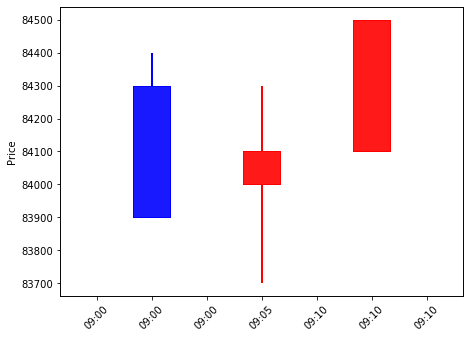

High =  84500 y =  84100.0 x1 =  0 x2 =  3


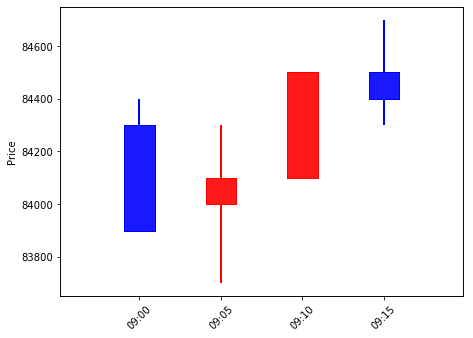

High =  84700 y =  84533.33333333333 x1 =  0 x2 =  4


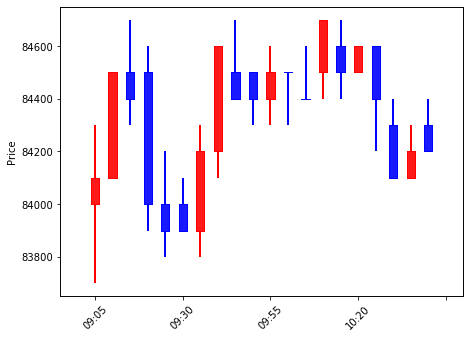

Low =  84200 y =  84366.66666666667 x1 =  0 x2 =  20


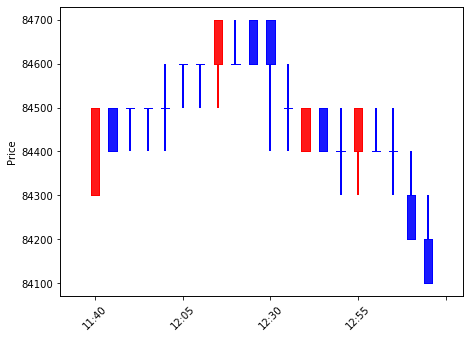

Low =  84100 y =  84200.0 x1 =  0 x2 =  20


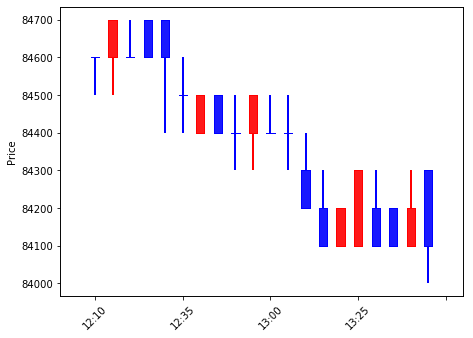

Low =  84000 y =  84100.0 x1 =  0 x2 =  20


In [27]:
import pymysql
import mplfinance as mpf
import pandas as pd

connect = pymysql.connect(host='localhost', port = 3306, user='root', 
            password='1234', db='INVESTAR', charset='utf8', 
                          autocommit = True, cursorclass = pymysql.cursors.DictCursor)
sql = "SELECT * FROM min_price WHERE code=000270 AND date LIKE '2021-09-17%'"
cur = connect.cursor()
cur.execute(sql)

df = cur.fetchmany(2)

def draw_linear(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1) # 기울기 계산
    n = y1 - (m*x1) # 절편 계산
    return m, n

def out_of_hline(x, y, m, n, h_num2):
    if y > m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final)
        h_num2 = x
        print('High = ', y, 'y = ', m*x+n, 'x1 = ', h_num1, 'x2 = ', h_num2)
        return y, h_num2
    else:
        return h_x2, h_num2
    
def out_of_lline(x, y, m, n, l_num2):
    if y < m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final) 
        l_num2 = x
        print('Low = ', y, 'y = ', m*x+n, 'x1 = ', l_num1, 'x2 = ', l_num2)
        return y, l_num2
    else:
        return l_x2, l_num2

def max_high(h_x2, h_num2):
    max_df = pd.DataFrame(df)
    max_df = max_df.drop([max_df.index[0]])
    h_x2 = max_df['High'].max()
    h_num2 = list(max_df['High']).index(h_x2)
    return h_x2, h_num2

def min_low(l_x2, l_num2):
    min_df = pd.DataFrame(df)
    min_df = min_df.drop([min_df.index[0]])
    l_x2 = min_df['Low'].min()
    l_num2 = list(min_df['Low']).index(l_x2)
    return l_x2, l_num2
    
kwargs=dict(type='candle')
mc=mpf.make_marketcolors(up='red', down='blue', inherit=True)
style_final=mpf.make_mpf_style(marketcolors=mc)


h_x1 = df[0]['High']
l_x1 = df[0]['Low']

h_x2 = df[1]['High']
l_x2 = df[1]['Low']

h_num1, l_num1, h_num2, l_num2 = 0, 0, 1, 1


data = cur.fetchone()

while data is not None:
    df.append(data)
    
    if len(df) > 20:
        del df[0]
        h_x1 = df[0]['High']
        l_x1 = df[0]['Low']
        if h_num1 == h_num2-1:
            h_x2, h_num2 = max_high(h_x2, h_num2)
        if l_num1 == l_num2-1:
            l_x2, l_num2 = min_low(l_x2, l_num2)
    
    h_m, h_n = draw_linear(h_num1, h_x1, h_num2, h_x2)
    l_m, l_n = draw_linear(l_num1, l_x1, l_num2, l_x2)
    h_x2, h_num2 = out_of_hline(len(df), data['High'], h_m, h_n, h_num2)
    l_x2, l_num2 = out_of_lline(len(df), data['Low'], l_m, l_n, l_num2)
    
    data = cur.fetchone()

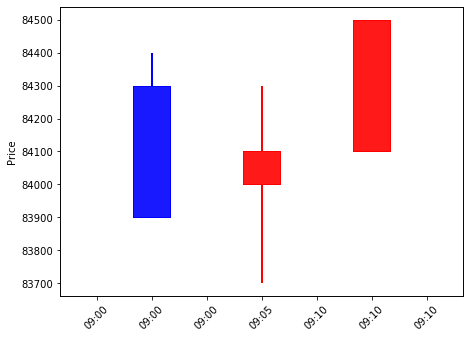

High =  84500 y =  84100.0 x2 =  1 x2' =  3


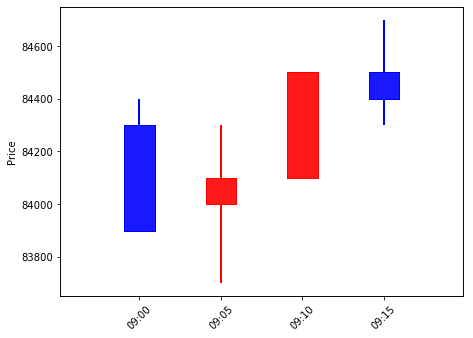

High =  84700 y =  84533.33333333333 x2 =  3 x2' =  4


In [53]:
# max, min
import pymysql
import mplfinance as mpf
import pandas as pd

connect = pymysql.connect(host='localhost', port = 3306, user='root', 
            password='1234', db='INVESTAR', charset='utf8', 
                          autocommit = True, cursorclass = pymysql.cursors.DictCursor)
sql = "SELECT * FROM min_price WHERE code=000270 AND date LIKE '2021-09-17%'"
cur = connect.cursor()
cur.execute(sql)

df = cur.fetchmany(2)

def draw_linear(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1) # 기울기 계산
    n = y1 - (m*x1) # 절편 계산
    return m, n

def out_of_hline(x, y, m, n, h_num2):
    if y > m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final)
        print('High = ', y, 'y = ', m*x+n, 'x2 = ', h_num2, "x2' = ", len(dict_df))
        h_num2 = len(dict_df)
        return y, h_num2
    else:
        return h_x2, h_num2
    
def out_of_lline(x, y, m, n, l_num2):
    if y < m*x + n:
        dict_df = pd.DataFrame(df)
        print(dict_df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final) 
        print('Low = ', y, 'y = ', m*x+n, 'x2 = ', l_num2, "x2' = ", len(dict_df))
        l_num2 = len(dict_df)
        return y, l_num2
    else:
        return l_x2, l_num2
    
def max_high(h_x2, h_num2):
    max_df = pd.DataFrame(df)
    max_df = max_df.drop([max_df.index[0]])
    h_x2 = max_df['High'].max()
    h_num2 = list(max_df['High']).index(h_x2)+1
    return h_x2, h_num2

def min_low(l_x2, l_num2):
    min_df = pd.DataFrame(df)
    min_df = min_df.drop([min_df.index[0]])
    l_x2 = min_df['Low'].min()
    l_num2 = list(min_df['Low']).index(l_x2)+1
    return l_x2, l_num2

kwargs=dict(type='candle')
mc=mpf.make_marketcolors(up='red', down='blue', inherit=True)
style_final=mpf.make_mpf_style(marketcolors=mc)


h_x1 = df[0]['High']
l_x1 = df[0]['Low']

h_x2 = df[1]['High']
l_x2 = df[1]['Low']

h_num1, l_num1, h_num2, l_num2 = 0, 0, 1, 1

data = cur.fetchone()
while data is not None:
    if len(df) > 19:
        del df[0]
        h_x1 = df[0]['High']
        l_x1 = df[0]['Low']
        if h_num1 == h_num2-1:
            h_x2, h_num2 = max_high(h_x2, h_num2)
        if l_num1 == l_num2-1:
            l_x2, l_num2 = min_low(l_x2, l_num2)
    
    df.append(data)
    h_m, h_n = draw_linear(h_num1, h_x1, h_num2, h_x2)
    l_m, l_n = draw_linear(l_num1, l_x1, l_num2, l_x2)
    h_x2, h_num2 = out_of_hline(len(df), data['High'], h_m, h_n, h_num2)
    l_x2, l_num2 = out_of_lline(len(df), data['Low'], l_m, l_n, l_num2)

    data = cur.fetchone()

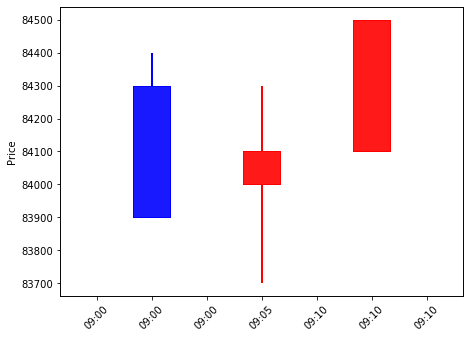

How =  84500 y =  84100.0 x2 =  1 x2' =  3


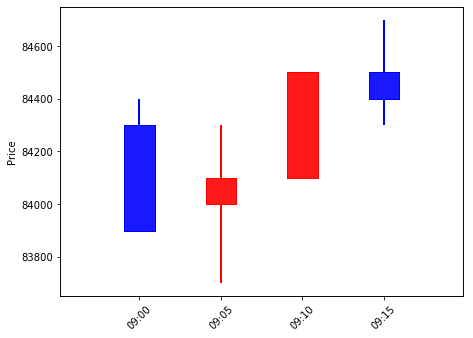

How =  84700 y =  84533.33333333333 x2 =  3 x2' =  4


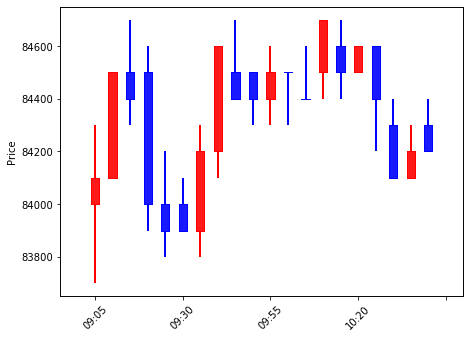

Low =  84200 y =  91700.0 x2 =  1 x2' =  20


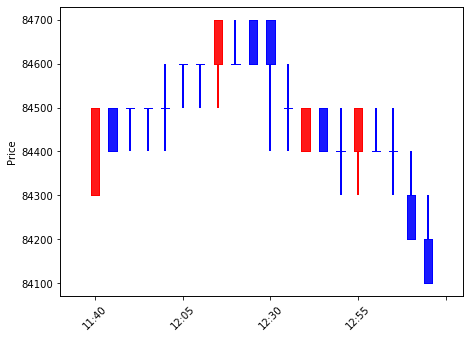

Low =  84100 y =  84200.0 x2 =  20 x2' =  20


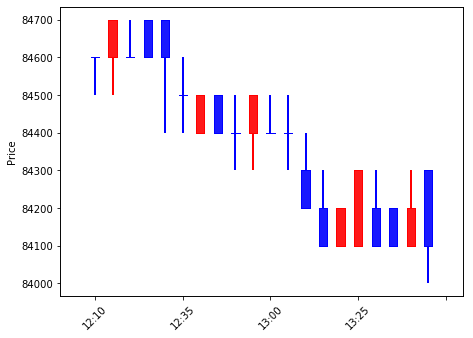

Low =  84000 y =  84100.0 x2 =  20 x2' =  20


In [37]:
# 2
import pymysql
import mplfinance as mpf
import pandas as pd

connect = pymysql.connect(host='localhost', port = 3306, user='root', 
            password='1234', db='INVESTAR', charset='utf8', 
                          autocommit = True, cursorclass = pymysql.cursors.DictCursor)
sql = "SELECT * FROM min_price WHERE code=000270 AND date LIKE '2021-09-17%'"
cur = connect.cursor()
cur.execute(sql)

df = cur.fetchmany(2)

def draw_linear(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1) # 기울기 계산
    n = y1 - (m*x1) # 절편 계산
    return m, n

def out_of_hline(x, y, m, n, h_num2):
    if y > m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final)
        print('High = ', y, 'y = ', m*x+n, 'x2 = ', h_num2, "x2' = ", len(dict_df))
        h_num2 = len(dict_df)
        return y, h_num2
    else:
        return h_x2, h_num2
    
def out_of_lline(x, y, m, n, l_num2):
    if y < m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final) 
        print('Low = ', y, 'y = ', m*x+n, 'x2 = ', l_num2, "x2' = ", len(dict_df))
        l_num2 = len(dict_df)
        return y, l_num2
    else:
        return l_x2, l_num2

kwargs=dict(type='candle')
mc=mpf.make_marketcolors(up='red', down='blue', inherit=True)
style_final=mpf.make_mpf_style(marketcolors=mc)


h_x1 = df[0]['High']
l_x1 = df[0]['Low']

h_x2 = df[1]['High']
l_x2 = df[1]['Low']

h_num1, l_num1, h_num2, l_num2 = 0, 0, 1, 1

data = cur.fetchone()
while data is not None:
    df.append(data)
    if len(df) > 20:
        del df[0]
        h_x1 = df[0]['High']
        l_x1 = df[0]['Low']
        if h_num1 == h_num2-1:
            h_num2 = 1
            h_x2 = df[1]['High']
        if l_num1 == l_num2-1:
            l_num2 = 1
            l_x2 = df[1]['Low']
    
    h_m, h_n = draw_linear(h_num1, h_x1, h_num2, h_x2)
    l_m, l_n = draw_linear(l_num1, l_x1, l_num2, l_x2)
    h_x2, h_num2 = out_of_hline(len(df), data['High'], h_m, h_n, h_num2)
    l_x2, l_num2 = out_of_lline(len(df), data['Low'], l_m, l_n, l_num2)

    data = cur.fetchone()

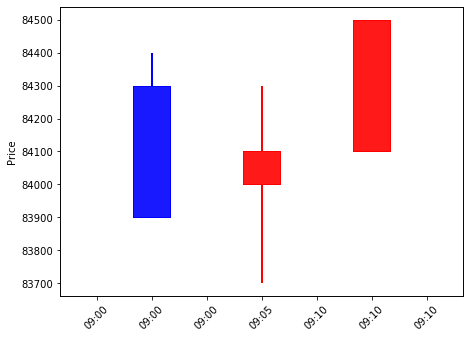

High =  84500 y =  84100.0 x2 =  1 x2' =  2


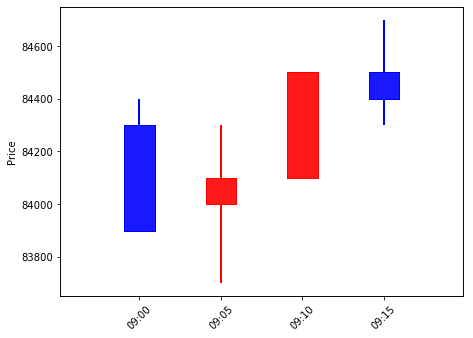

High =  84700 y =  84600.0 x2 =  2 x2' =  3


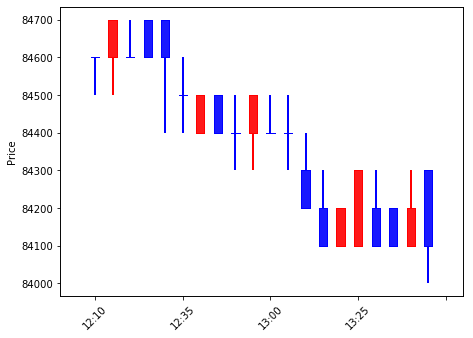

Low =  84000 y =  84055.55555555556 x2 =  18 x2' =  19


In [46]:
# 19
import pymysql
import mplfinance as mpf
import pandas as pd

connect = pymysql.connect(host='localhost', port = 3306, user='root', 
            password='1234', db='INVESTAR', charset='utf8', 
                          autocommit = True, cursorclass = pymysql.cursors.DictCursor)
sql = "SELECT * FROM min_price WHERE code=000270 AND date LIKE '2021-09-17%'"
cur = connect.cursor()
cur.execute(sql)

df = cur.fetchmany(2)

def draw_linear(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1) # 기울기 계산
    n = y1 - (m*x1) # 절편 계산
    return m, n

def out_of_hline(x, y, m, n, h_num2):
    if y > m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final)
        print('High = ', y, 'y = ', m*x+n, 'x2 = ', h_num2, "x2' = ", len(dict_df)-1)
        h_num2 = len(dict_df)-1
        return y, h_num2
    else:
        return h_x2, h_num2
    
def out_of_lline(x, y, m, n, l_num2):
    if y < m*x + n:
        dict_df = pd.DataFrame(df)
        dict_df.set_index('Date',inplace = True)
        mpf.plot(dict_df, **kwargs, style=style_final) 
        print('Low = ', y, 'y = ', m*x+n, 'x2 = ', l_num2, "x2' = ", len(dict_df)-1)
        l_num2 = len(dict_df)-1
        return y, l_num2
    else:
        return l_x2, l_num2

kwargs=dict(type='candle')
mc=mpf.make_marketcolors(up='red', down='blue', inherit=True)
style_final=mpf.make_mpf_style(marketcolors=mc)


h_x1 = df[0]['High']
l_x1 = df[0]['Low']

h_x2 = df[1]['High']
l_x2 = df[1]['Low']

h_num1, l_num1, h_num2, l_num2 = 0, 0, 1, 1

data = cur.fetchone()
while data is not None:
    df.append(data)
    if len(df) > 20:
        del df[0]
        h_x1 = df[0]['High']
        l_x1 = df[0]['Low']
        if h_num1 == h_num2-1:
            h_num2 = 18
            h_x2 = df[18]['High']
        if l_num1 == l_num2-1:
            l_num2 = 18
            l_x2 = df[18]['Low']
    
    h_m, h_n = draw_linear(h_num1, h_x1, h_num2, h_x2)
    l_m, l_n = draw_linear(l_num1, l_x1, l_num2, l_x2)
    h_x2, h_num2 = out_of_hline(len(df), data['High'], h_m, h_n, h_num2)
    l_x2, l_num2 = out_of_lline(len(df), data['Low'], l_m, l_n, l_num2)

    data = cur.fetchone()